What are the files for each event?

In [20]:
import pandas as pd
import numpy as np
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

sim_dir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu'

reg = 'CT'
if reg == 'CT':
    eve_list = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/sampling_input_CT_38.csv'
elif reg == 'SR':
    eve_list = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/sampling_input_SR_54.csv'

#load file in pandas
eve = pd.read_csv(eve_list,sep = ',')
eve_row = 878 #starts from 0
eve_id = eve['id'][eve_row]

#else hard code a eve
# eve_id = 'PS_manning003/E02872N3705E03360N3467-PS-Str_PNo_Hom-M850_E03209N3503_S000' #no deform cyprus event
# eve_id = 'PS_manning003/E02020N3739E02658N3366-PS-Str_PYes_Var-M902_E02188N3566_S003' #big PS event
# eve_id ='BS_4-8_manning003/E01470N3877E01631N3641-BS-M792_E01583N3715_D010_S112D90R090_A008541_S034' #downlifted/uplifted 
# eve_id = 'BS_manning003/E01267N3753E01646N3535-BS-M732_E01502N3737_D010_S202D50R090_A001180_S030' #uplifted/downlifted

# eve_id = 'BS_manning003/E01267N3753E01646N3535-BS-M809_E01470N3715_D010_S067D50R270_A006995_S075' #50-50 uplifted/downlifted
# eve_id = 'BS_manning003/E01267N3753E01646N3535-BS-M774_E01498N3715_D107_S067D70R090_A003139_S050' #last setting

#eve_id = 'BS_manning003/E01108N3882E01527N3690-BS-M809_E01424N3782_D010_S292D70R270_A012497_S042'
# eve_id = 'PS_manning003/E02020N3739E02658N3366-PS-Str_PYes_Var-M871_E02264N3453_S001' #to show time window
# eve_id = 'PS_manning003/E02020N3739E02658N3366-PS-Mur_PYes_Hom-M880_E02229N3514_S005' #to show wave spectrum
eve_id = 'BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034' #to check error event

#E01267N3753E01646N3535-BS-M809_E01463N3670_D010_S202D70R270_A006995_S075 #peculiar deformation
#E01267N3753E01646N3535-BS-M754_E01502N3737_D010_S157D70R270_A001972_S039
#E01267N3753E01646N3535-BS-M809_E01470N3715_D010_S067D70R270_A006995_S075
#E01267N3753E01646N3535-BS-M809_E01495N3692_D010_S022D50R090_A006995_S075
#E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034 #overpred
#
#E01267N3753E01646N3535-BS-M809_E01495N3692_D010_S022D50R270_A006995_S075 #depth

#read the file in one of the sim event folder
eve_path = os.path.join(sim_dir,eve_id)
file_list = glob.glob(eve_path + '/*.nc')
file_list.sort()
print(*file_list,sep = "\n")
print('')
for i in range(len(file_list)):
    print(file_list[i])
    ds = xr.open_dataset(file_list[i])
    print(ds)


/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034/CT_deformation.nc
/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034/CT_flowdepth.nc
/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034/CT_height.nc
/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034/C_CT.nc
/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034/C_SR.nc
/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034/SR_deformation.nc
/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/BS_manning003/E01108N3882E

In [21]:
#check if the z is different for the same location in the grid of two different simulation events

# f1 = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_manning003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/SR_deformation.nc'
# f2 = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_manning003/E01517N3917E01678N3772-PS-Mur_PYes_Hom-M774_E01587N3805_S000/SR_deformation.nc'
# dZ1 = xr.open_dataset(f1) #gridts file
# dZ2 = xr.open_dataset(f2) #gridts file
# print(dZ1.deformation)
# print(dZ1.deformation.sel(x=15.34,y=37.08,method='nearest'))
# print(dZ2.deformation.sel(x=15.34,y=37.08,method='nearest'))

# f3 = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_manning003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/SR_defbathy.nc'
# f4 = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_manning003/E01517N3917E01678N3772-PS-Mur_PYes_Hom-M774_E01587N3805_S000/SR_defbathy.nc'
# Z1 = xr.open_dataset(f3) #gridts file
# Z2 = xr.open_dataset(f4) #gridts file

# # print(Z1.z)
# print(Z1.z.sel(x=15.34,y=37.08,method='nearest'))
# print(Z2.z.sel(x=15.34,y=37.08,method='nearest'))

#resampled time series folder( has multiple info on deformation,height,velocity and elevation)
# f5 = r'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/PS_manning003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M707_E01550N3812_S000/CT_flowdepth.nc'
# # f6 = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/C_SR.nc'
# F1 = xr.open_dataset(f5) #gridts file
# # F2 = xr.open_dataset(f6) #gridts file

# print(F1)
# #print lat long limits
# print(F1.lat.min().values,F1.lat.max().values)
# print(F1.lon.min().values,F1.lon.max().values)

# print(F2)

# # print(Z1.z.sel(x=15.34,y=37.08,method='nearest'))
# # print(Z2.z.sel(x=15.34,y=37.08,method='nearest'))

# ts = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/grid0_ts.nc'
# F1 = xr.open_dataset(ts) #gridts file
# print(F1)

# d = r'/mnt/data/nragu/Tsunami/INGV/IUSS_INGV_Repo/data/simu/PS_003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/C_SR_flowdepth.nc'
# D1 = xr.open_dataset(d) #gridts file
# print(D1)

# #plot the z
# xr.plot.pcolormesh(D1.z, cmap='jet')


Map to see the offshore points and onshore grids

plotting BS_manning003/E01108N3882E01527N3690-BS-M792_E01481N3782_D010_S157D70R270_A008541_S034


/tmp/ipykernel_126715/101018336.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_function = matplotlib.cm.get_cmap('coolwarm')



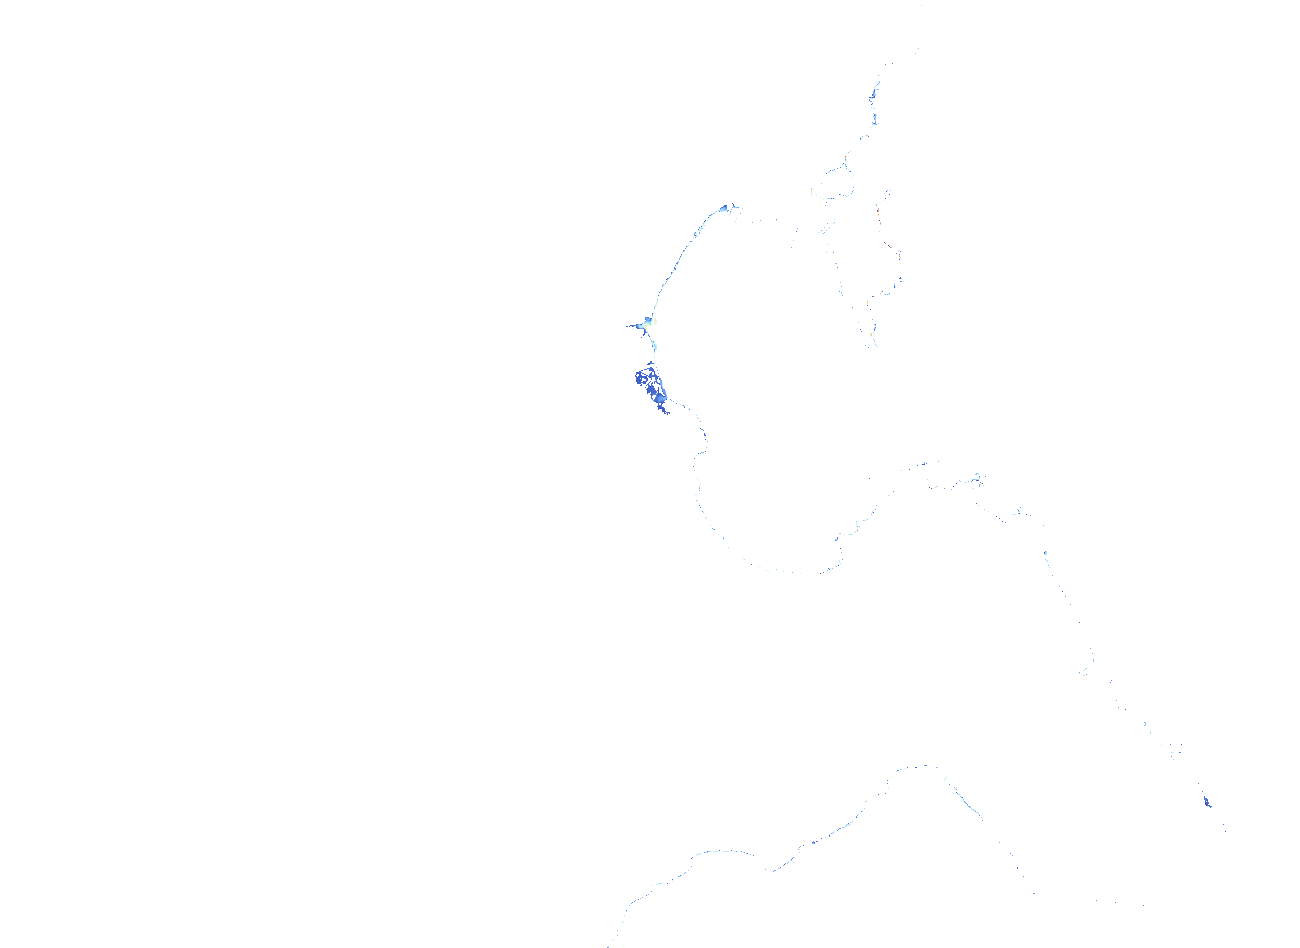
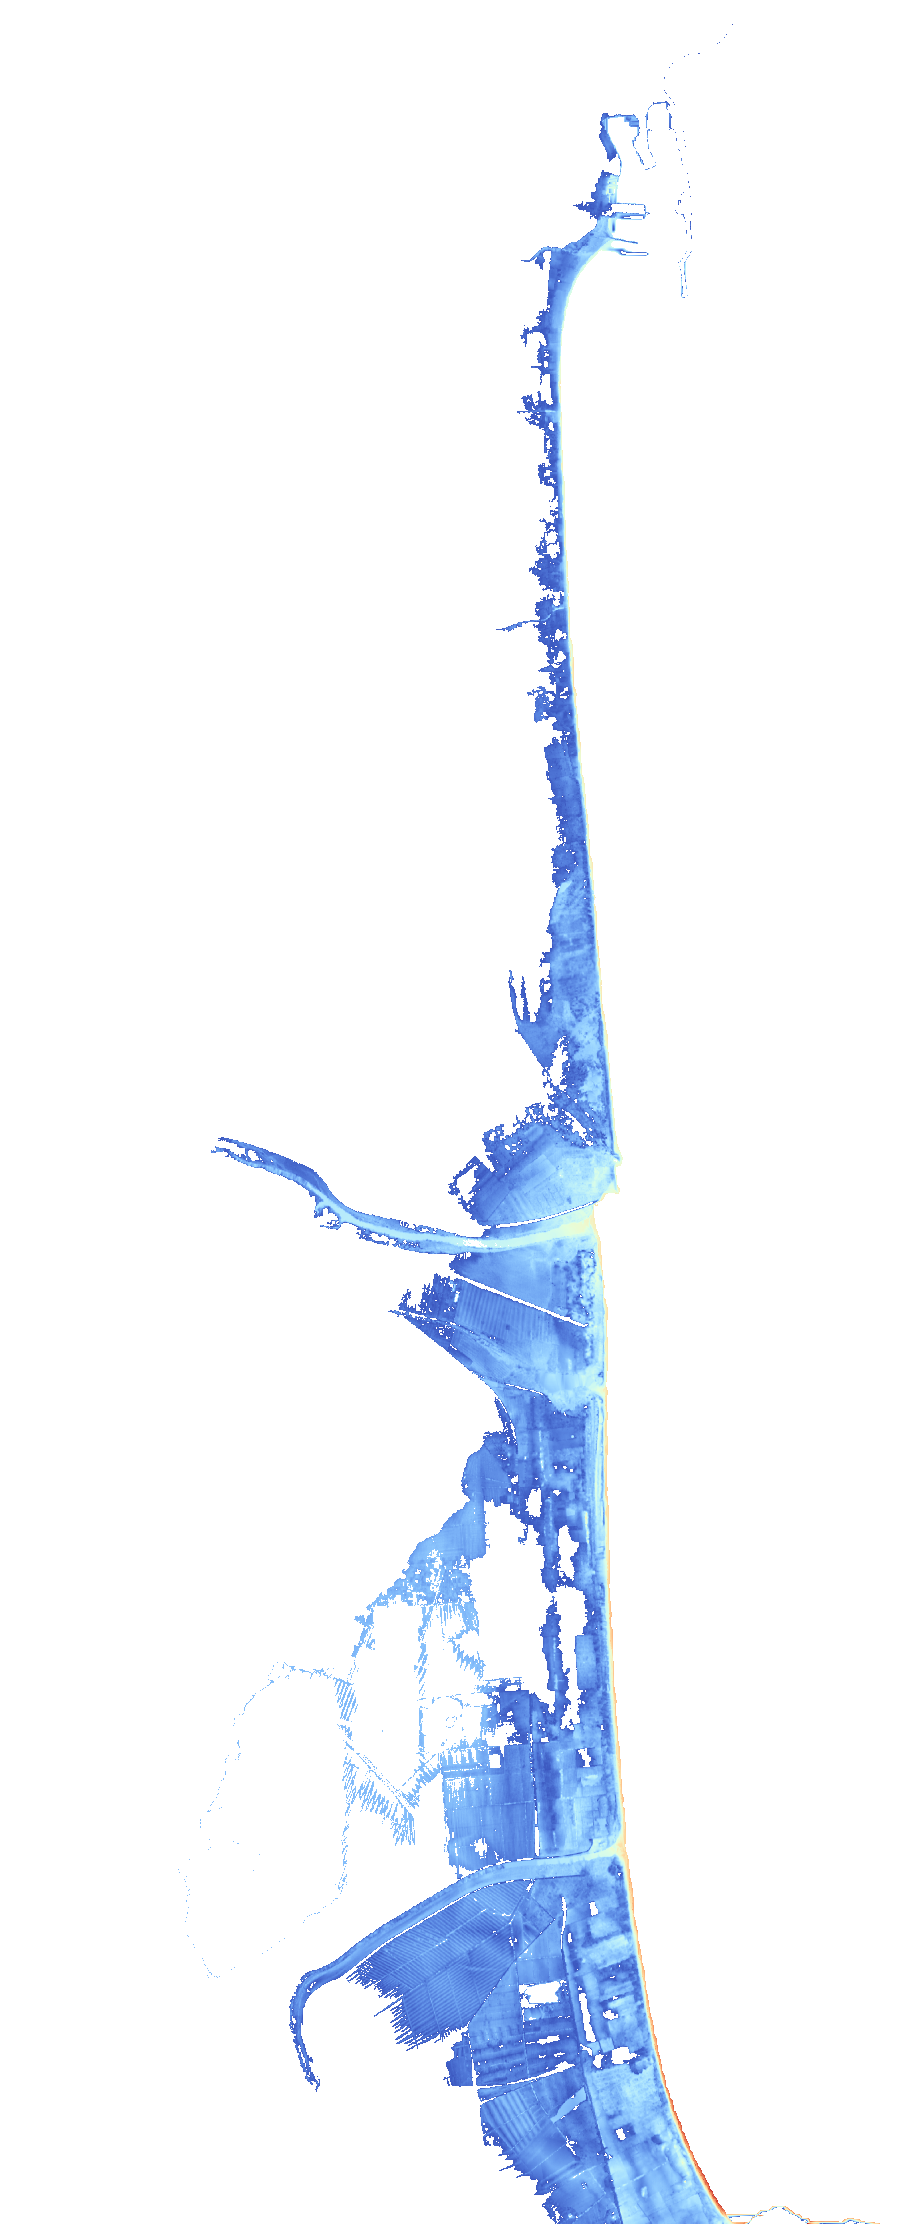
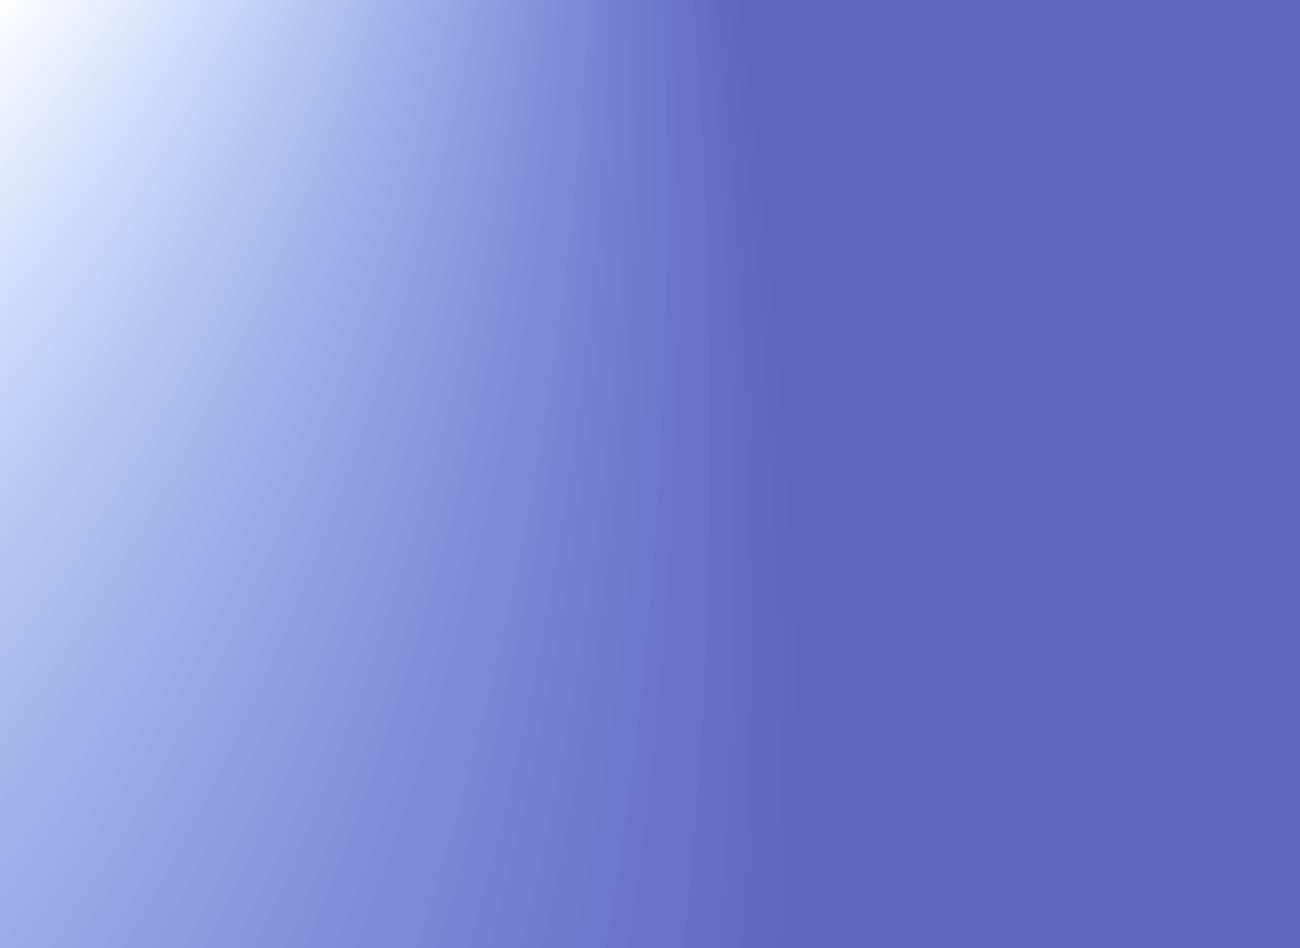
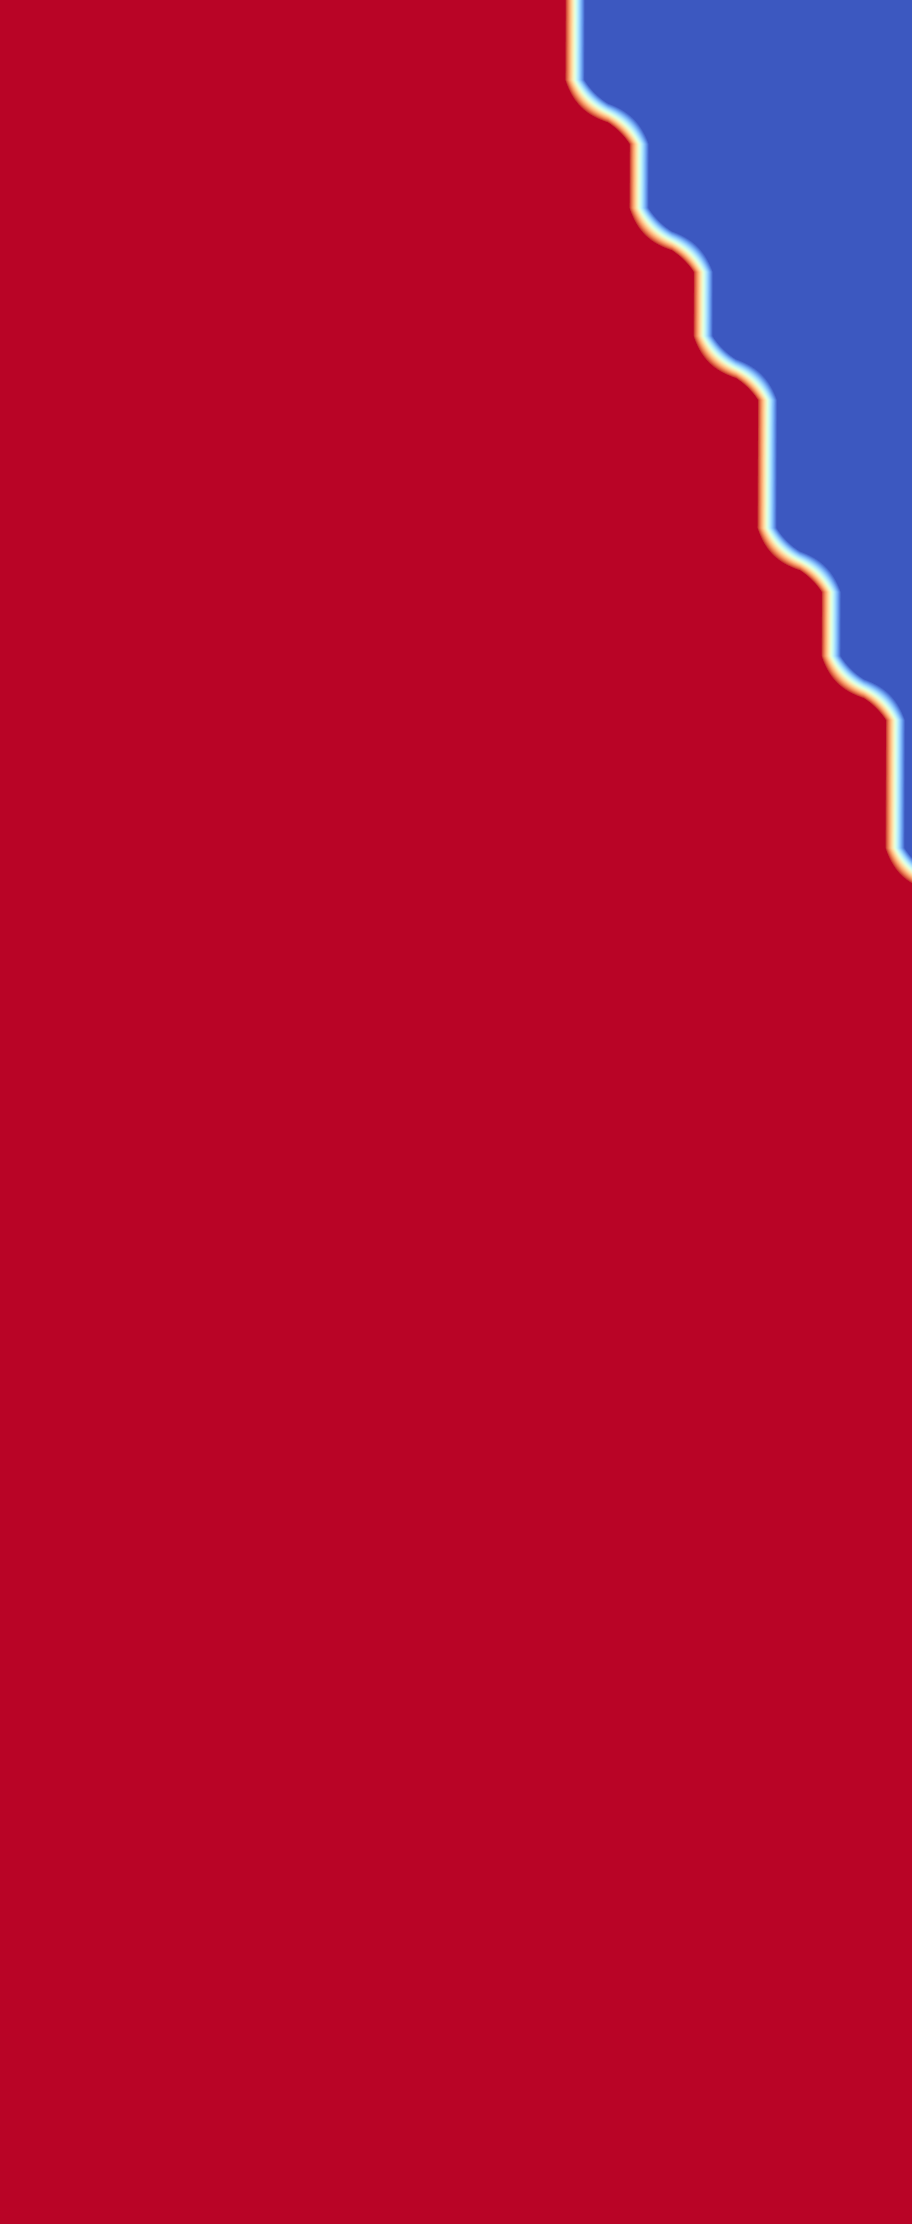

In [22]:
import folium
import folium.plugins

# Load the points file
data_pts = np.loadtxt('../../resources/raw/pois_eastern_sicily_2km.txt', dtype=str) #from file shared by Manuela

id_pts = data_pts[:, 0]
lon_pts = data_pts[:, 1].astype(float)
lat_pts = data_pts[:, 2].astype(float)
# z_pts = data_pts[:, 3].astype(float)
z_pts = np.loadtxt('../../resources/raw/pois_depth.csv', dtype=str, delimiter=',',usecols=3,skiprows=1 ) #from grid ts file of eve cyprus

#CT_deformation.nc 0
#CT_flowdepth.nc 1
#CT_height.nc 2
#C_CT.nc 3
#C_SR.nc 4
#SR_deformation.nc 5
#SR_flowdepth.nc 6
#SR_height.nc 7
#grid0_ts.nc 8

ds_ts = xr.open_dataset(file_list[-1]) #grid ts file
ds_grids_CT = xr.open_dataset(file_list[1]) #grid CT depth file
ds_grids_SR = xr.open_dataset(file_list[6]) #grid ST depth file
ds_def_CT = xr.open_dataset(file_list[0]) #grid CT def file
ds_def_SR = xr.open_dataset(file_list[5]) #grid ST def file

# Create a Folium map centered on the data's extent
m = folium.Map(location=[np.mean(lat_pts),np.mean(lon_pts)], zoom_start=10,)

# Basemaps
folium.TileLayer(tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True,
        show = False).add_to(m)

# Create a feature group for the offshore points 
fg_pts = folium.FeatureGroup(name='Offshore Points NEAMTHM18').add_to(m)
fg_ptsNC = folium.FeatureGroup(name='Offshore Points NetCDF').add_to(m)
fg_gridnc_SR = folium.FeatureGroup(name='SR Depth Grid NetCDF').add_to(m)
fg_gridnc_CT = folium.FeatureGroup(name='CT DepthGrid NetCDF').add_to(m)
fg_defnc_SR = folium.FeatureGroup(name='SR Def NetCDF').add_to(m)
fg_defnc_CT = folium.FeatureGroup(name='CT Def NetCDF').add_to(m)

#add eq lat lon point
print('plotting',eve_id)

#BS_manning003/E01267N3753E01646N3535-BS-M732_E01530N3737_D208_S112D10R090_A001180_S030
#BS_4-8_manning003/E01267N3753E01646N3535-BS-M809_E01564N3602_D010_S247D70R270_A006995_S075
#PS_manning003/E02113N3823E02873N3483-PS-Str_PYes_Var-M809_E02344N3564_S000


if eve_id.split('/')[0] == 'BS_manning003':
    lon = float(str(eve_id).split('_')[2][1:5])/10
    lat = float(str(eve_id).split('_')[2][7:11])/100
elif eve_id.split('/')[0] == 'PS_manning003':
    lon = float(str(eve_id).split('_')[-2][1:5])/10
    lat = float(str(eve_id).split('_')[-2][7:11])/100
elif eve_id.split('/')[0] == 'BS_4-8_manning003':
    lon = float(str(eve_id).split('_')[3][1:5])/10
    lat = float(str(eve_id).split('_')[3][7:11])/100

folium.CircleMarker(location=[lat,lon],radius = 5,color='red',fill_color = 'red').add_to(m)

# Add a marker for each point with a tooltip showing its id
for id, lat, lon,z in zip(id_pts, lat_pts, lon_pts, z_pts):
    info = f"ID:{id}, Depth: {z} "  # Create tooltip string
    folium.Marker(location=[lat, lon],
                  tooltip=info,
                  icon=folium.Icon(color='blue', icon='')).add_to(fg_pts)

df_ts = pd.DataFrame({'lat':ds_ts.latitude.values.astype(float),
                      'lon':ds_ts.longitude.values.astype(float),
                      'z':ds_ts.deformed_bathy.values.astype(float)})

for i,row in df_ts.iterrows():
    info = f"ID:{i}, Depth: {row['z']} "  # Create tooltip string
    folium.Marker(location=[row['lat'], row['lon']],
                  tooltip=info,
                 icon=folium.Icon(color='red', icon='')).add_to(fg_ptsNC)

# Add grid netcdfs for CT    
data2plot = ds_grids_CT
data = np.flipud(data2plot.z.values.astype(float))
def2plot = ds_def_CT
defo = np.flipud(def2plot.deformation.values.astype(float))

lon,lat = np.meshgrid(data2plot.lon.values.astype(float),
                      data2plot.lat.values.astype(float))

ext = [[lat.min(),lon.min()],
         [lat.max(),lon.max()]]
cm_function = matplotlib.cm.get_cmap('coolwarm')
norm = (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data)) 

folium.raster_layers.ImageOverlay(cm_function(norm),ext,opacity=0.5).add_to(fg_gridnc_CT)
folium.raster_layers.ImageOverlay(cm_function(defo),ext,opacity=0.5).add_to(fg_defnc_CT)

# Add grid netcdfs for SR
data2plot = ds_grids_SR
data = np.flipud(data2plot.z.values.astype(float))
def2plot = ds_def_SR
defo = np.flipud(def2plot.deformation.values.astype(float))

lon,lat = np.meshgrid(data2plot.lon.values.astype(float),
                      data2plot.lat.values.astype(float))

ext = [[lat.min(),lon.min()],
         [lat.max(),lon.max()]]

norm = (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data)) 

folium.raster_layers.ImageOverlay(cm_function(norm),ext,opacity=0.5,interactive=True).add_to(fg_gridnc_SR)
folium.raster_layers.ImageOverlay(cm_function(defo),ext,opacity=0.5).add_to(fg_defnc_SR)


# Add a layer control to turn on/off the feature groups
folium.LayerControl().add_to(m)
folium.plugins.MousePosition().add_to(m)

#save as html
# m.save('./../resources/gis/html/event_example.html')

m


Offshore time series

In [23]:
ds = xr.open_dataset(file_list[-1]) #offshore ts file
print(ds)

<xarray.Dataset>
Dimensions:         (grid_npoints: 87, time: 481)
Coordinates:
  * time            (time) datetime64[ns] 1970-01-01 ... 1970-01-01T04:00:00....
Dimensions without coordinates: grid_npoints
Data variables:
    deformed_bathy  (grid_npoints) float32 ...
    longitude       (grid_npoints) float64 ...
    latitude        (grid_npoints) float64 ...
    min_height      (grid_npoints) float32 ...
    max_height      (grid_npoints) float32 ...
    eta             (time, grid_npoints) float32 ...
    ux              (time, grid_npoints) float32 ...
    uy              (time, grid_npoints) float32 ...
Attributes: (12/28)
    Conventions:                    CF-1.0
    title:                          Time series output of Tsunami-HySEA model
    Tsunami-HySEA_version:          3.8.1
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No paper
    ...                             ...
    stabil

Plot each location time series 53:58 for Siracusa and 35:44 for Catania in each subplot

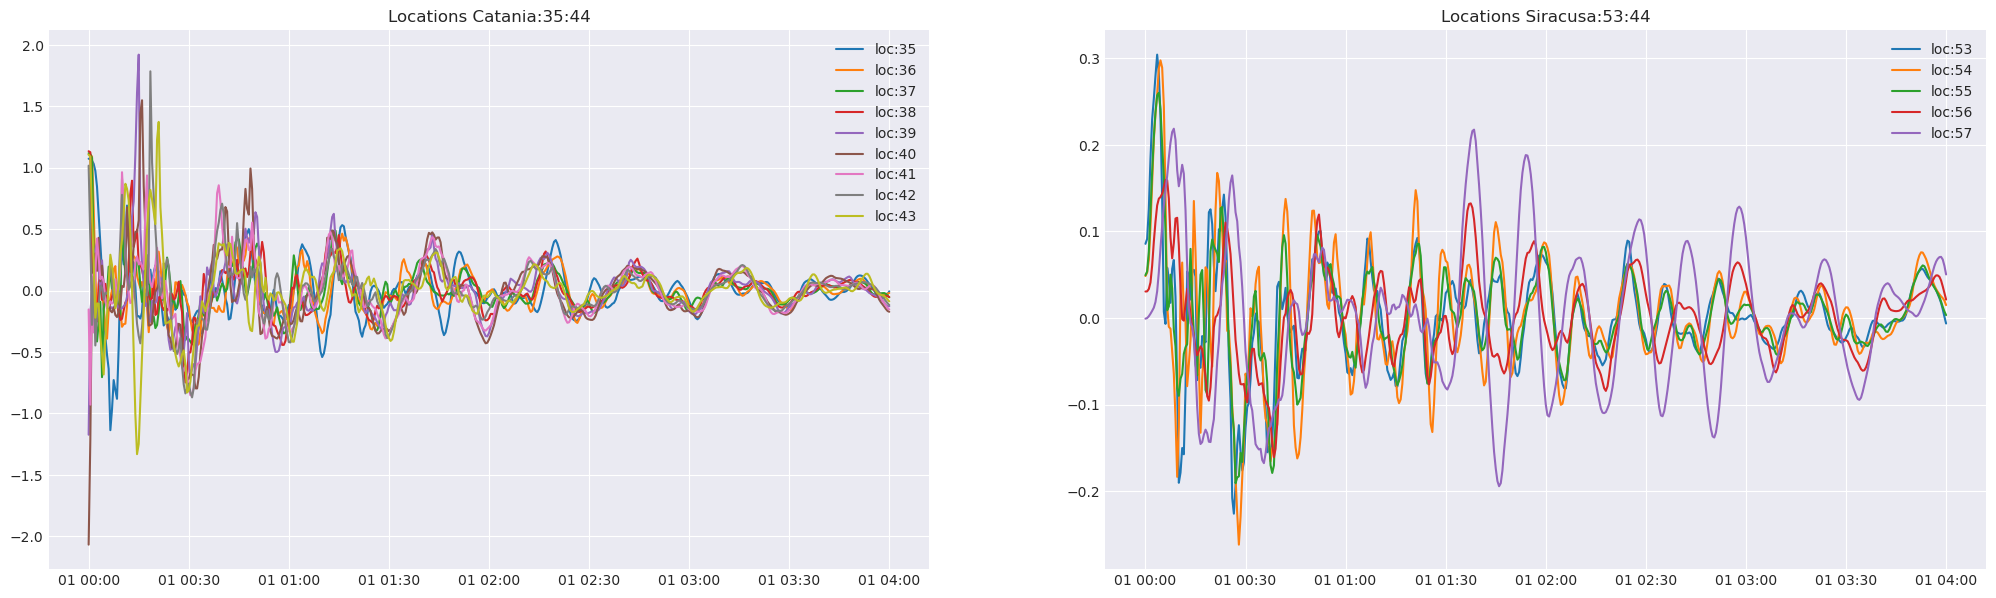

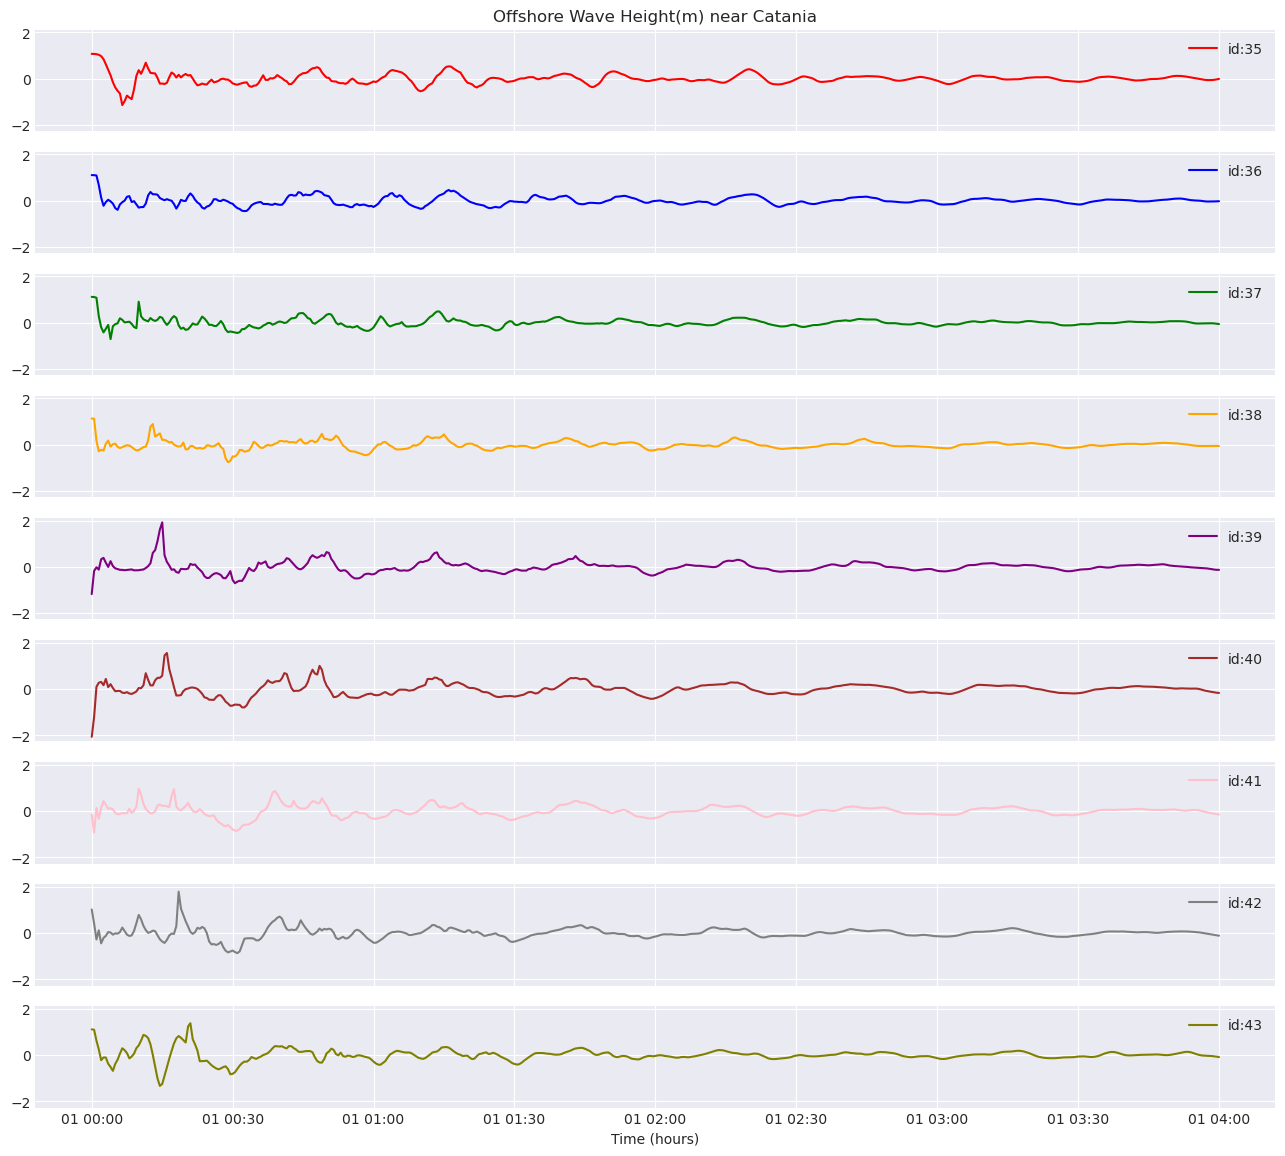

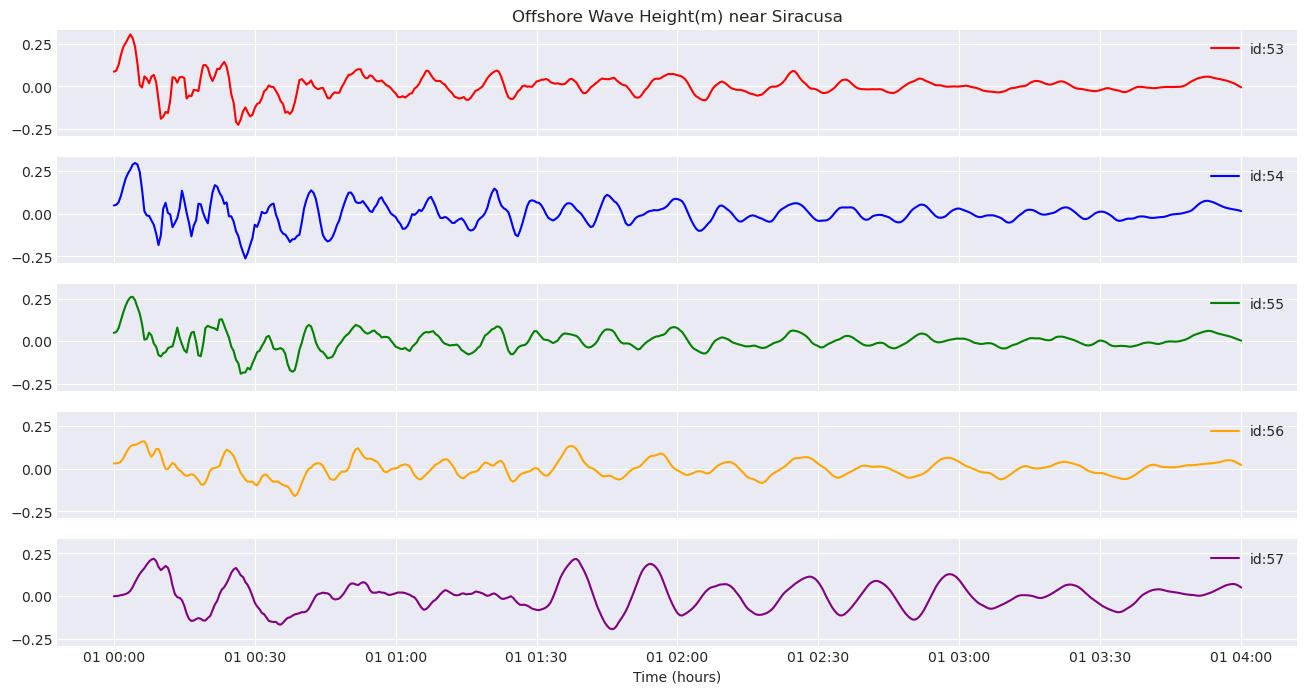

In [24]:

fig, ax = plt.subplots(1, 2, figsize=(25, 7))

for i in range(35,44):
    ax[0].plot(ds.time,ds.eta[:,i],label = f'loc:{i}')
ax[0].set_title(f'Locations Catania:35:44')
ax[0].set_label
ax[0].legend()

for i in range(53,58):
    ax[1].plot(ds.time,ds.eta[:,i],label = f'loc:{i}')
ax[1].set_title(f'Locations Siracusa:53:44')
ax[1].set_label
ax[1].legend()

plt.show()

color_list = ['red','blue','green','orange','purple','brown','pink','gray','olive','cyan']

fig, ax = plt.subplots(9, 1, figsize=(16, 14),sharex=True,sharey=True)
for i in range(35,44):
    ax[i-35].plot(ds.time,ds.eta[:,i],label = f'id:{i}',color=color_list[i-35])
    ax[i-35].legend(loc='upper right') 

ax[0].set_title(f'Offshore Wave Height(m) near Catania')
ax[8].set_xlabel('Time (hours)')


fig, ax = plt.subplots(5, 1, figsize=(16, 8),sharex=True,sharey=True)
for i in range(53,58):
    ax[i-53].plot(ds.time,ds.eta[:,i],label = f'id:{i}',color=color_list[i-53])
    ax[i-53].legend(loc='upper right') 

ax[0].set_title(f'Offshore Wave Height(m) near Siracusa')
ax[4].set_xlabel('Time (hours)')


plt.show()



Offshore data time series for a specific representative gauge

/tmp/ipykernel_126715/468663889.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


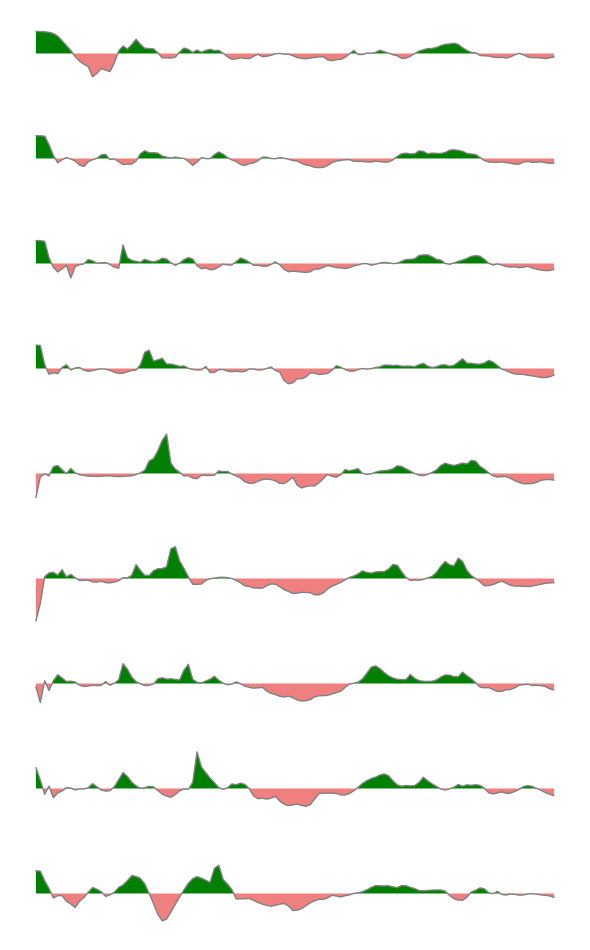

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
fig, ax = plt.subplots(9, 1, figsize=(6, 10), sharex=True, sharey=True)

# Customize the style
plt.style.use('seaborn-darkgrid')

# Loop through the data
for i in range(35, 44):
    # Plot the data
    ax[i - 35].plot(ds.time[:120], ds.eta[:120, i], label=f'id:{i}', color='grey', linewidth=1)

    # Set axis off
    ax[i - 35].set_axis_off()

    # Fill values above and below 0 with color
    ax[i - 35].fill_between(ds.time[:120], ds.eta[:120, i], 0, where=ds.eta[:120, i] > 0, facecolor='green', interpolate=True)
    ax[i - 35].fill_between(ds.time[:120], ds.eta[:120, i], 0, where=ds.eta[:120, i] < 0, facecolor='lightcoral', interpolate=True)

# Adjust layout to prevent clipping of titles
fig.tight_layout(rect=[0, 0, 1, 0.96])

#save as svg with transparent background
# plt.savefig('./../PaperII/plots/eta.svg', transparent=True)

# Display the plot
plt.show()


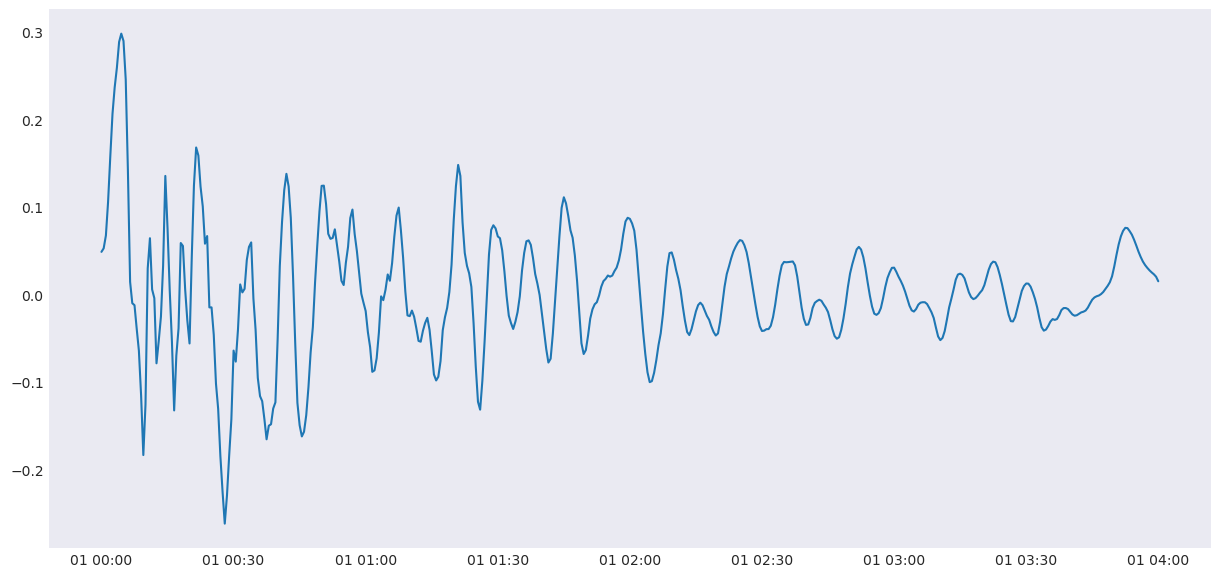

In [26]:
plt.figure(figsize=(15, 7))
plt.plot(ds.time,ds.eta[:,54],label = f'loc:{0}')   #41 is the location of Catania #54 is the location of Siracusa
plt.grid(which = 'major')


Depth and deformation at offshore points from gridts

In [27]:
# #save these 3 as csv for a cyprus eq event without deformation
# df = pd.DataFrame({'lat':ds.latitude.values.astype(float),
#                    'lon':ds.longitude.values.astype(float),
#                    'z':ds.deformed_bathy.values.astype(float)})
# df.to_csv('./../../resources/raw/pois_depth.csv',index=True)

# # # to save the depth from a specific grid ts file

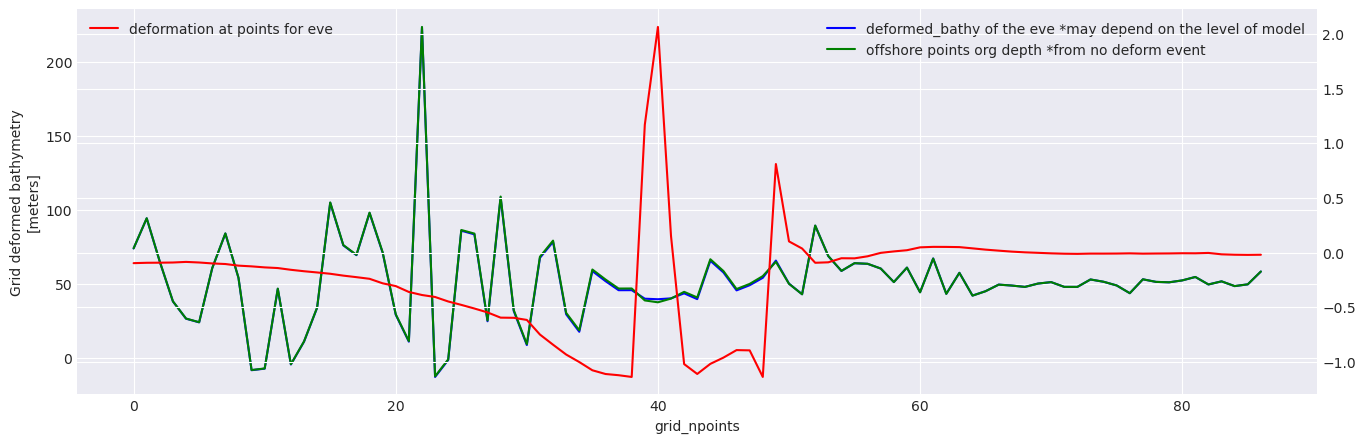

In [28]:
plt.figure(figsize=(16, 5))
# Plot the first lines
ds.deformed_bathy.plot(label='deformed_bathy of the eve *may depend on the level of model', color='blue')
plt.plot(z_pts.astype(float), label='offshore points org depth *from no deform event', color='green')
plt.legend(loc='upper right')
# Create a new y-axis for the third line
ax2 = plt.gca().twinx()
ax2.plot(ds.deformed_bathy.values.astype(float) - z_pts.astype(float), label='deformation at points for eve', color='red')

# Display legends for all lines
plt.legend(loc='upper left')
# Show the plot
plt.show()


Had to rename some file names which had some the event id joined to it

In [29]:
# file_list = glob.glob('./../data/simu/PS_manning003/**/*SR_defbathy.nc')
# print(len(file_list))
# with open ('SR_rename.txt', 'w') as file:
#     for idx, item in enumerate (file_list):
#         file.write(',')
#         file.write(item)


# for file in file_list:
#     # print(file)
#     # print(os.path.join(file.rsplit('/',1)[-2],'SR_defbathy.nc'))
#     os.rename(file,os.path.join(file.rsplit('/',1)[-2],'SR_defbathy.nc')) 
    

Grid Data

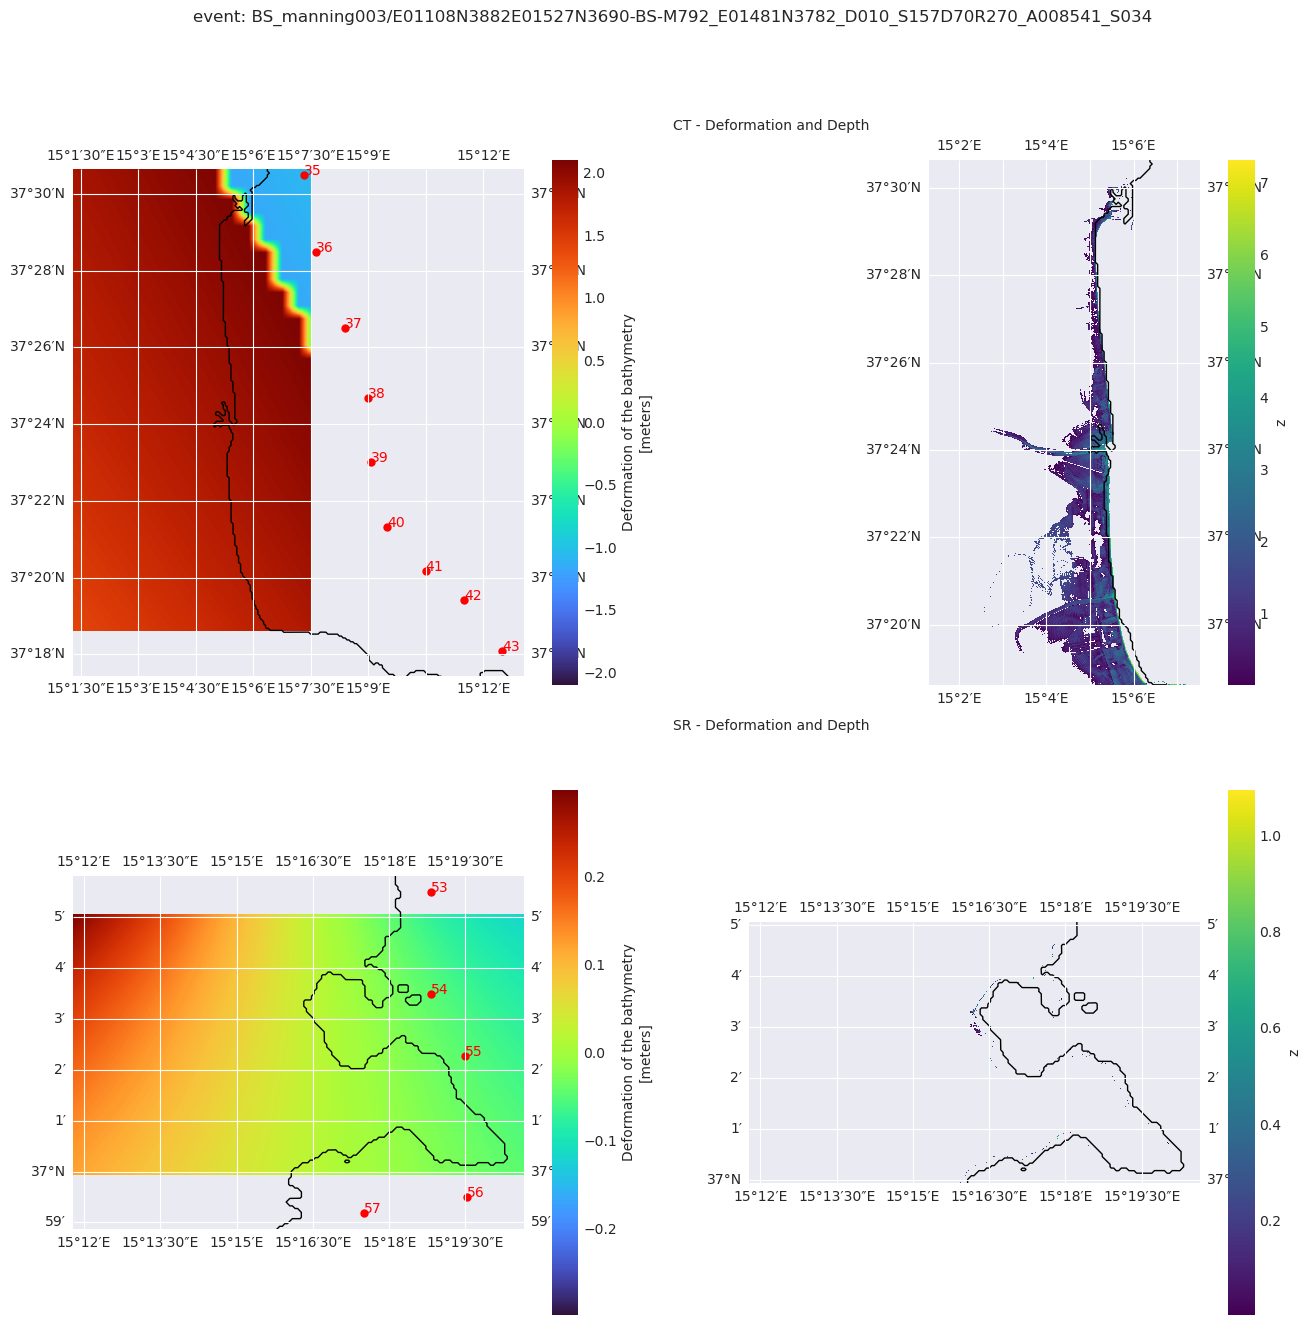

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds_grids_CT = xr.open_dataset(file_list[0]) #gridts file
ds_grids_SR = xr.open_dataset(file_list[5]) #gridts file

ds_grids_CT_d = xr.open_dataset(file_list[1]) #gridts file
ds_grids_SR_d = xr.open_dataset(file_list[6]) #gridts file

# print(ds_grids_CT)
# print(ds_grids_SR)
#plot offshore gauges location and annotate df_ts range(53,58)
# and df_ts range(35,44) for siracusa and catania

ts_CT = df_ts.iloc[35:44]
ts_SR = df_ts.iloc[53:58]

#plot maps of max height and deformations
fig,ax = plt.subplots(2,2,figsize=(16,15), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

plt.suptitle('event: '+eve_id)
plt.figtext(0.5,0.9,'CT - Deformation and Depth')
plt.figtext(0.5,0.5,'SR - Deformation and Depth')

ds_grids_CT_d.z.plot(ax=ax[1])#, title = 'Depth CT')
ds_grids_CT.deformation.plot(ax=ax[0],cmap = 'turbo' )#, title = 'Deformation CT')
ax[0].plot(ts_CT.lon,ts_CT.lat,'o',color='red',markersize=5)
#add gaguge no as text
for i in range(35,44):
    ax[0].text(ts_CT.lon[i],ts_CT.lat[i],str(i),color='red',fontsize=10)


ds_grids_SR_d.z.plot(ax=ax[3])#, title = 'Depth SR')
ds_grids_SR.deformation.plot(ax=ax[2],cmap = 'turbo' )#, title = 'Deformation SR')
ax[2].plot(ts_SR.lon,ts_SR.lat,'o',color='red',markersize=5)
#add gaguge no as text
for i in range(53,58):
    ax[2].text(ts_SR.lon[i],ts_SR.lat[i],str(i),color='red',fontsize=10)


coast = cfeature.GSHHSFeature(scale='full')
for i in range(4):
        ax[i].add_feature(coast, edgecolor='black')
        ax[i].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

In [31]:
for i, txt in enumerate(ts_CT.index):
    print(i,txt)

0 35
1 36
2 37
3 38
4 39
5 40
6 41
7 42
8 43


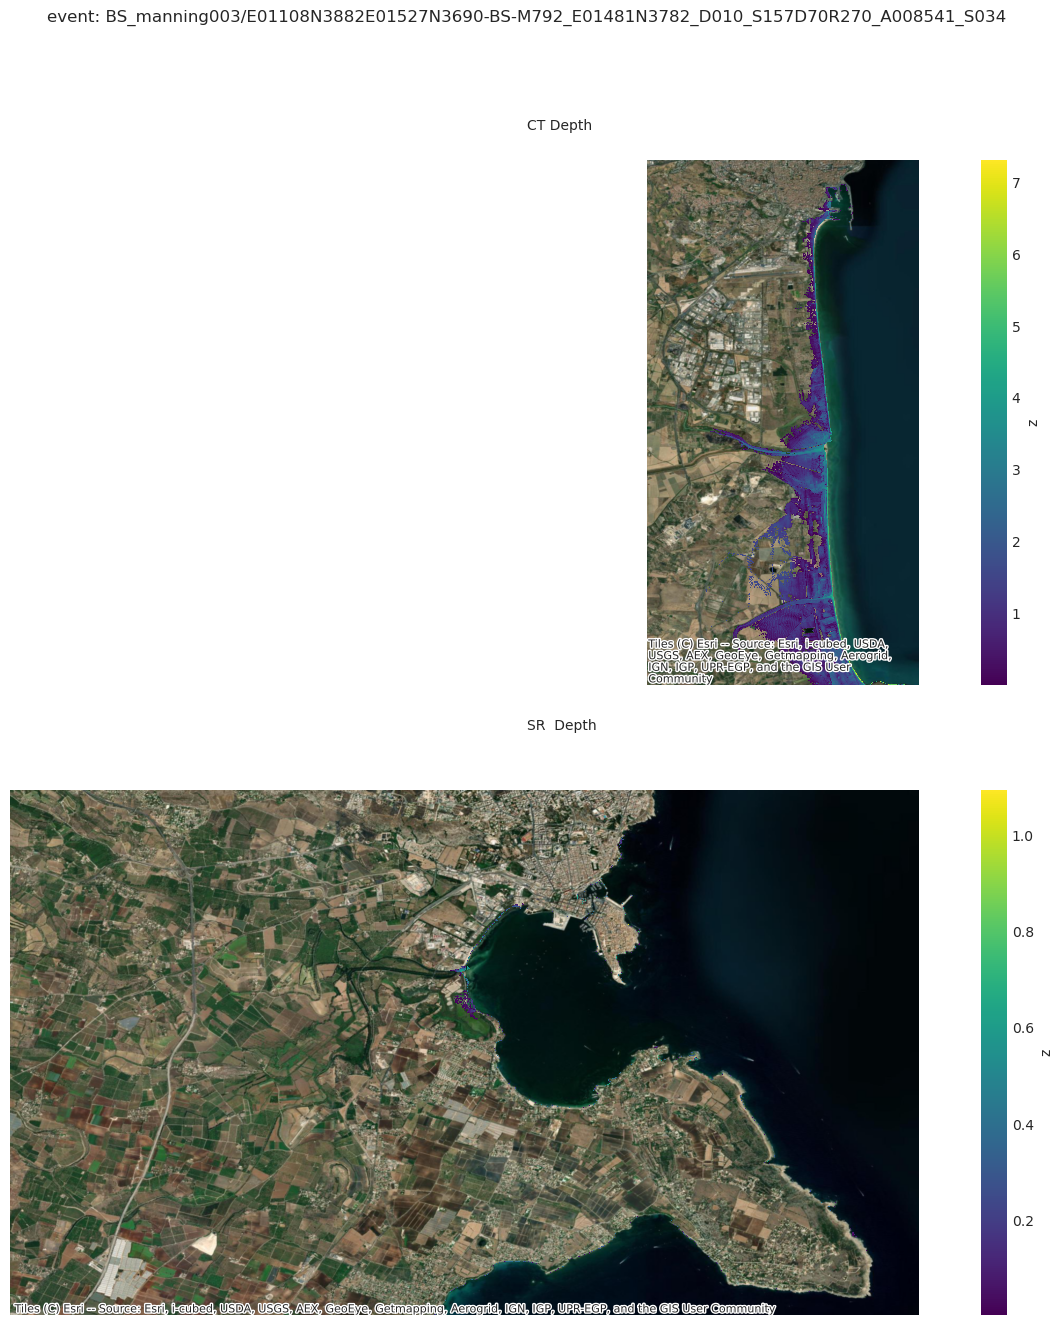

In [32]:
import contextily as cx
import matplotlib.pyplot as plt

ds_grids_CT_d = xr.open_dataset(file_list[1]) #gridts file
ds_grids_SR_d = xr.open_dataset(file_list[6]) #gridts file

#plot maps of max height and deformations
fig,ax = plt.subplots(2,1,figsize=(16,15), subplot_kw={'projection': ccrs.PlateCarree()})
plt.suptitle('event: '+eve_id)
plt.figtext(0.5,0.9,'CT Depth')
plt.figtext(0.5,0.5,'SR  Depth')

ds_grids_CT_d.z.plot(ax=ax[0])#, title = 'Depth CT')
ds_grids_SR_d.z.plot(ax=ax[1])#, title = 'Depth SR')


cx.add_basemap(ax[0],crs='EPSG:4326', source=cx.providers.Esri.WorldImagery)
cx.add_basemap(ax[1],crs='EPSG:4326', source=cx.providers.Esri.WorldImagery)

plt.show()

Try to mask use deformed bathy and plot only onshore values

max ele <xarray.DataArray 'z' ()>
array(233.37023926)


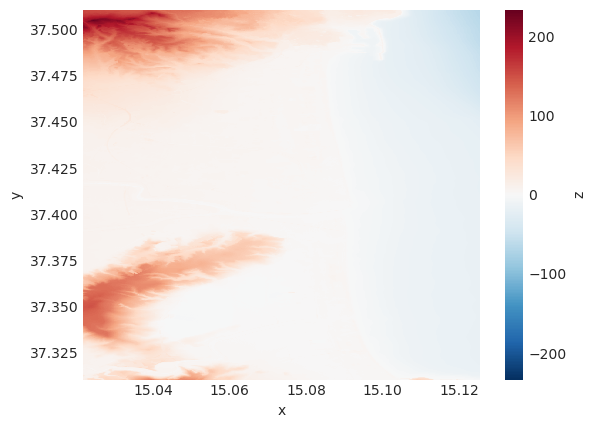

max def <xarray.DataArray 'deformation' ()>
array(2.10193014)


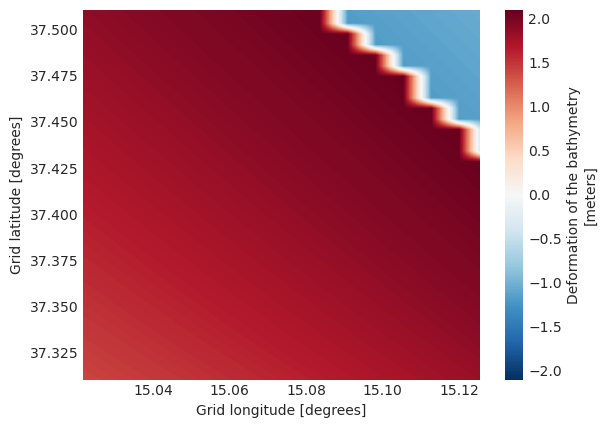

max dep <xarray.DataArray 'z' ()>
array(7.31001043)


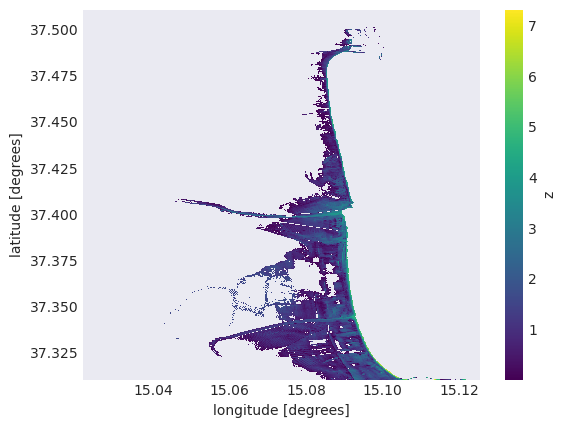

max height <xarray.DataArray 'z' ()>
array(8.17273331)


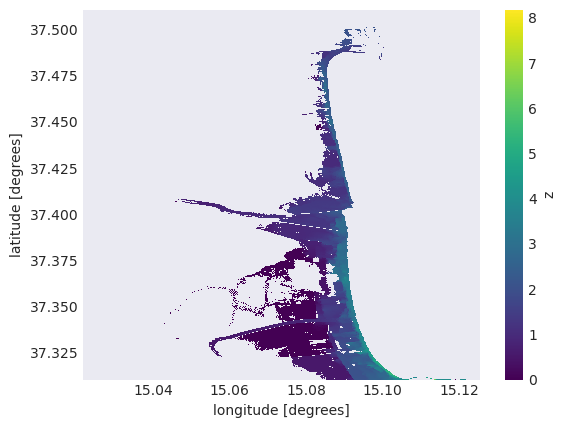

In [33]:
ds_Z = xr.open_dataset('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/CT_defbathy.nc') #not available so hard coded
ds_dZ = xr.open_dataset(file_list[0]) #deformation file
ds_D = xr.open_dataset(file_list[1]) #flowdepth file
ds_H = xr.open_dataset(file_list[2])  #height file
ds_nc = xr.open_dataset(file_list[3]) #netcdf

print('max ele',ds_Z.z.max())
ds_Z.z.plot()
plt.show()

print('max def',ds_dZ.deformation.max())
ds_dZ.deformation.plot()
plt.show()

print('max dep',ds_D.z.max())
ds_D.z.plot()
plt.show()

print('max height',ds_H.z.max())
ds_H.z.plot()
plt.show()

#deformed elevation = z + deformation
ds_elev = ds_Z.z - ds_dZ.deformation


#calculate depth from height and predeformed elevation
# depth = ds_H.max_height.values - ds_elev.values
# depth = xr.DataArray(depth, dims=ds_H.max_height.dims, coords=ds_H.max_height.coords)
# depth = depth.where(ds_Z.z.values > 0)
# depth = depth.where(depth.values > 0)
# depth.plot()


# i = 700
# j = 600

# z = ds_Z.z[i,j].values.astype(float)
# dZ = ds_dZ.deformation[i,j].values.astype(float)
# D = ds_D.z[i,j].values.astype(float)
# H = ds_H.max_height[i,j].values.astype(float)

# print('z,dZ,D,H',z,dZ,D,H)

# print('check if h = z+D here',z+D)

# print('if we remove dZ from all variable for ML training',dZ)

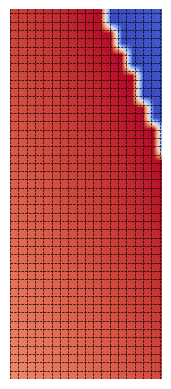

In [34]:
#plot ds_dZ.deformation.values without label or axis
plt.imshow(ds_dZ.deformation.values,cmap='coolwarm')
plt.gca().invert_yaxis()
plt.axis('off')
#add artificial grid lines on top
for i in range(0,ds_dZ.deformation.shape[0],50):
    plt.axhline(i,color='black',linewidth=0.5,linestyle='--')
for i in range(0,ds_dZ.deformation.shape[1],50):
    plt.axvline(i,color='black',linewidth=0.5,linestyle='--')
#save as png
plt.savefig('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/results/poster_deformation.png',transparent=True,dpi=600)



max ele <xarray.DataArray 'z' ()>
array(97.37104034)


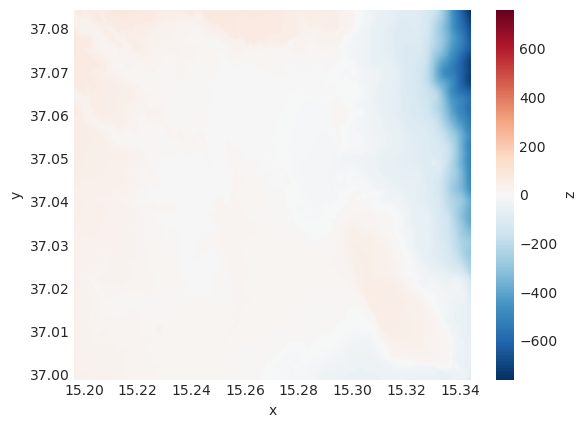

max def <xarray.DataArray 'deformation' ()>
array(0.29831386)


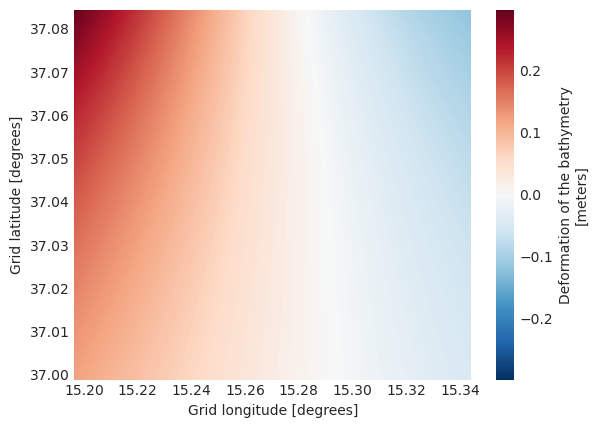

max dep <xarray.DataArray 'z' ()>
array(1.09380734)


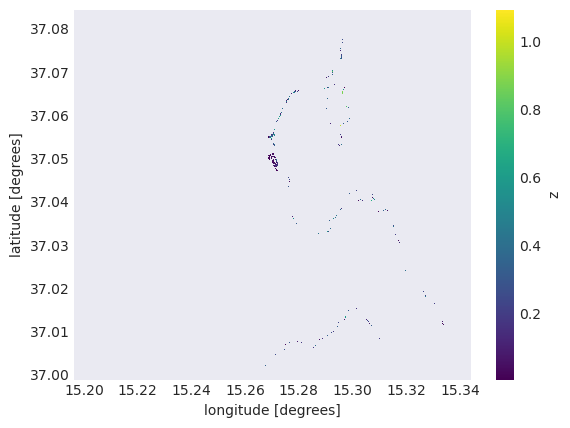

max height <xarray.DataArray 'z' ()>
array(1.35194778)


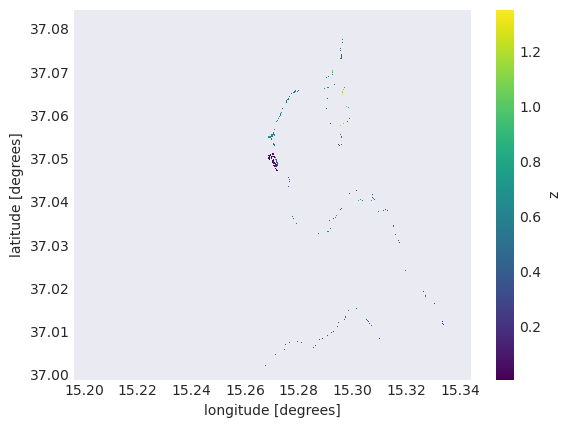

In [35]:
ds_Z = xr.open_dataset('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/SR_defbathy.nc') #not available so hard coded
ds_dZ = xr.open_dataset(file_list[5]) #deformation file
ds_D = xr.open_dataset(file_list[6]) #flowdepth file
ds_H = xr.open_dataset(file_list[7])  #height
ds_nc = xr.open_dataset(file_list[4]) #netcdf

print('max ele',ds_Z.z.max())
ds_Z.z.plot()
plt.show()

print('max def',ds_dZ.deformation.max())
ds_dZ.deformation.plot()
plt.show()

print('max dep',ds_D.z.max())
ds_D.z.plot()
plt.show()

print('max height',ds_H.z.max())
ds_H.z.plot()
plt.show()

#deformed elevation = z + deformation
ds_elev = ds_Z.z - ds_dZ.deformation


#calculate depth from height and predeformed elevation
# depth = ds_H.max_height.values - ds_elev.values
# depth = xr.DataArray(depth, dims=ds_H.max_height.dims, coords=ds_H.max_height.coords)
# depth = depth.where(ds_Z.z.values > 0)
# depth = depth.where(depth.values > 0)
# depth.plot()


# i = 700
# j = 600

# z = ds_Z.z[i,j].values.astype(float)
# dZ = ds_dZ.deformation[i,j].values.astype(float)
# D = ds_D.z[i,j].values.astype(float)
# H = ds_H.max_height[i,j].values.astype(float)

# print('z,dZ,D,H',z,dZ,D,H)

# print('check if h = z+D here',z+D)

# print('if we remove dZ from all variable for ML training',dZ)

Some quick plots about overall dataset

In [36]:
# all_eve_df_CT = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CDepth_CT_alleve53550.onshore.txt',sep='\t')
# all_eve_df_SR = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CDepth_SR_alleve53550.onshore.txt',sep='\t')
# about_eveCT = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/sampling_input_CT_41.csv',sep=',')
# about_eveSR = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/sampling_input_SR_54.csv',sep=',')
# deform_eve =  pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/deform_eve_7929.csv',sep=',')
# about_eve = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/allinfo_eventsBS_PS53550.txt',sep=',')


# #repeat for Siracusa
# print('SIRACUSA')
# #plt hist of all variables as subplots
# fig, axs = plt.subplots(2, 3,figsize=(7,6))
# axs[0, 0].hist(all_eve_df_SR['max'])
# axs[0, 0].set_title('max')
# axs[0, 1].hist(all_eve_df_SR['count'])
# axs[0, 1].set_title('count')
# axs[0, 2].hist(all_eve_df_SR['logsum'])
# axs[0, 2].set_title('logsum')
# axs[1, 0].hist(all_eve_df_SR['mean'])
# axs[1, 0].set_title('mean')
# axs[1, 1].hist(all_eve_df_SR['sd'])
# axs[1, 1].set_title('std')
# plt.show()


# # Set up the figure and axes
# fig, axs = plt.subplots(1, 5, figsize=(7, 3))
# # Flatten the axs array for easier indexing
# axs = axs.flatten()
# # Plot boxplots for each variable
# axs[0].boxplot(all_eve_df_SR['max'])
# axs[0].set_title('max')
# axs[1].boxplot(all_eve_df_SR['count'])
# axs[1].set_title('count')
# axs[2].boxplot(all_eve_df_SR['logsum'])
# axs[2].set_title('logsum')
# axs[3].boxplot(all_eve_df_SR['mean'])
# axs[3].set_title('mean')
# axs[4].boxplot(all_eve_df_SR['sd'])
# axs[4].set_title('std')
# plt.tight_layout()
# plt.show()


# #repeat for Catania
# print('CATANIA')
# fig, axs = plt.subplots(2, 3,figsize=(7,6))
# axs[0, 0].hist(all_eve_df_CT['max'])
# axs[0, 0].set_title('max')
# axs[0, 1].hist(all_eve_df_CT['count'])
# axs[0, 1].set_title('count')
# axs[0, 2].hist(all_eve_df_CT['logsum'])
# axs[0, 2].set_title('logsum')
# axs[1, 0].hist(all_eve_df_CT['mean'])
# axs[1, 0].set_title('mean')
# axs[1, 1].hist(all_eve_df_CT['sd'])
# axs[1, 1].set_title('std')
# plt.show()

# # Set up the figure and axes
# fig, axs = plt.subplots(1, 5, figsize=(7, 3))
# # Flatten the axs array for easier indexing
# axs = axs.flatten()
# # Plot boxplots for each variable
# axs[0].boxplot(all_eve_df_CT['max'])
# axs[0].set_title('max')
# axs[1].boxplot(all_eve_df_CT['count'])
# axs[1].set_title('count')
# axs[2].boxplot(all_eve_df_CT['logsum'])
# axs[2].set_title('logsum')
# axs[3].boxplot(all_eve_df_CT['mean'])
# axs[3].set_title('mean')
# axs[4].boxplot(all_eve_df_CT['sd'])
# axs[4].set_title('std')
# plt.tight_layout()
# plt.show()


In [37]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import seaborn as sns

# # Load data from your selected station
# max_amp_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleve53550.offshore.txt'
# waveperiod_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveWP53550.offshore.txt'

# df_amp = pd.read_csv(max_amp_file, sep='\t')
# df_wp = pd.read_csv(waveperiod_file, sep='\t')

# st = 40

# # Extract the data for the selected station
# id = df_amp.iloc[:, 0]
# max_amp = df_amp.iloc[:, st + 1]
# waveperiod = df_wp.iloc[:, st + 1]

# # Create a DataFrame for the selected station
# df = pd.DataFrame({'id': id, 'max_amp': max_amp, 'waveperiod': waveperiod})

# # Split the first 2 characters of id into a new column 'type'
# df['type'] = df['id'].str[:2]

# # Define the number of bins for your heatmap
# num_bins = 15

# # Create a heatmap for each 'type' using hue as quantiles
# types = ['PS', 'BS']
# for type in types:
#     station_df = df[df['type'] == type]
#     station_df = station_df[['max_amp', 'waveperiod']]
    
#     plt.figure(figsize=(10, 8))
#     kdeplot = sns.jointplot(station_df, x='waveperiod', y='max_amp', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
#     # Move colorbar to the right
#     plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
#     # get the current positions of the joint ax and the ax for the marginal x
#     pos_joint_ax = kdeplot.ax_joint.get_position()
#     pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
#     # reposition the joint ax so it has the same width as the marginal x ax
#     kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
#     # reposition the colorbar using new x positions and y positions of the joint ax
#     kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
#     kdeplot.fig.suptitle('Joint plot of Maximum Amplitude vs Wave Period for ' + type + ' type')
#     plt.xlabel('Wave Period (mins)')
#     plt.ylabel('Maximum Amplitude (m)')
#     plt.show()


# # Create a heatmap for all 'types' with color split across quantiles
# plt.figure(figsize=(10, 8))
# all_types_df = df
# kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='max_amp', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
# # Move colorbar to the right
# plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# # get the current positions of the joint ax and the ax for the marginal x
# pos_joint_ax = kdeplot.ax_joint.get_position()
# pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# # reposition the joint ax so it has the same width as the marginal x ax
# kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# # reposition the colorbar using new x positions and y positions of the joint ax
# kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
# kdeplot.fig.suptitle('Joint plot of Maximum Amplitude vs Wave Period for all events')
# plt.xlabel('Wave Period (mins)')
# plt.ylabel('Maximum Amplitude (m)')
# plt.xlim(0, 120)
# plt.ylim(0, 4)
# plt.show()

# # Create a heatmap for all 'types' with color split across quantiles
# plt.figure(figsize=(10, 8))
# all_types_df = df
# kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='max_amp',hue="type",kind='kde', color='k', alpha = 0.7)
# plt.xlabel('Wave Period (mins)')
# plt.ylabel('Maximum Amplitude (m)')
# kdeplot.fig.suptitle('Joint plot of Maximum Amplitude vs Wave Period for both type of events', y=1.075)
# plt.xlim(0, 120)
# plt.ylim(0, 4)
# plt.show()

Pick events by some filter and plot

In [38]:
# data_events = pd.read_csv('../../resources/processed/eve_PS_SourceRegion.txt',sep='\t')
# #plot historgram across source regions of the magnitude
# arr = data_events['Mag']
# bins  = np.arange( 7.0,  9.4, 0.4)
# fig=plt.figure(figsize=(6,5))
# n, bins, patches = plt.hist(arr, bins = bins, facecolor='red', align='mid')
 
# plt.xticks(bins)
# plt.xlabel('magnitude', fontsize = 13)
# plt.ylabel('Number of scenarios', fontsize = 13)
# plt.title(r'Histogram of Mw ', fontsize=14)

# # Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)
# plt.show()

# arr = data_events[data_events['SR']=='CL']['Mag']
# bins  = np.arange( 7.0,  9.4, 0.4)
# fig=plt.figure(figsize=(6,5))
# n, bins, patches = plt.hist(arr, bins = bins, facecolor='red', align='mid')
 
# plt.xticks(bins)
# plt.xlabel('magnitude', fontsize = 13)
# plt.ylabel('Number of scenarios', fontsize = 13)
# plt.title(r'Histogram of Mw (Calabria Arc)', fontsize=14)

# # Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)
# plt.show()

# arr = data_events[data_events['SR']=='HL']['Mag']
# bins  = np.arange( 7.0,  9.4, 0.4)
# fig=plt.figure(figsize=(6,5))
# n, bins, patches = plt.hist(arr, bins = bins, facecolor='red', align='mid')
 
# plt.xticks(bins)
# plt.xlabel('magnitude', fontsize = 13)
# plt.ylabel('Number of scenarios', fontsize = 13)
# plt.title(r'Histogram of Mw (Helenic SZ)', fontsize=14)

# # Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)
# plt.show()

# arr = data_events[data_events['SR']=='CY']['Mag']
# bins  = np.arange( 7.0,  9.4, 0.4)
# fig=plt.figure(figsize=(6,5))
# n, bins, patches = plt.hist(arr, bins = bins, facecolor='red', align='mid')
 
# plt.xticks(bins)
# plt.xlabel('magnitude', fontsize = 13)
# plt.ylabel('Number of scenarios', fontsize = 13)
# plt.title(r'Histogram of Mw (Cyprus Arc)', fontsize=14)

# # Tweak spacing to prevent clipping of ylabel
# plt.subplots_adjust(left=0.15)
# plt.show()
